In [1]:
                                                        # LOGISTIC REGRESSION

In [2]:
# 1. Data Exploration:

In [3]:
# a. Load the dataset and perform exploratory data analysis (EDA).

In [4]:
import pandas as pd
df_train = pd.read_csv("Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# remove extra columns which is not useful and can no impactful on my model
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
df_train.shape

(891, 5)

In [7]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [8]:
# b. Examine the features, their types, and summary statistics.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [10]:
df_train.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [11]:
# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and 
# relationships between features.

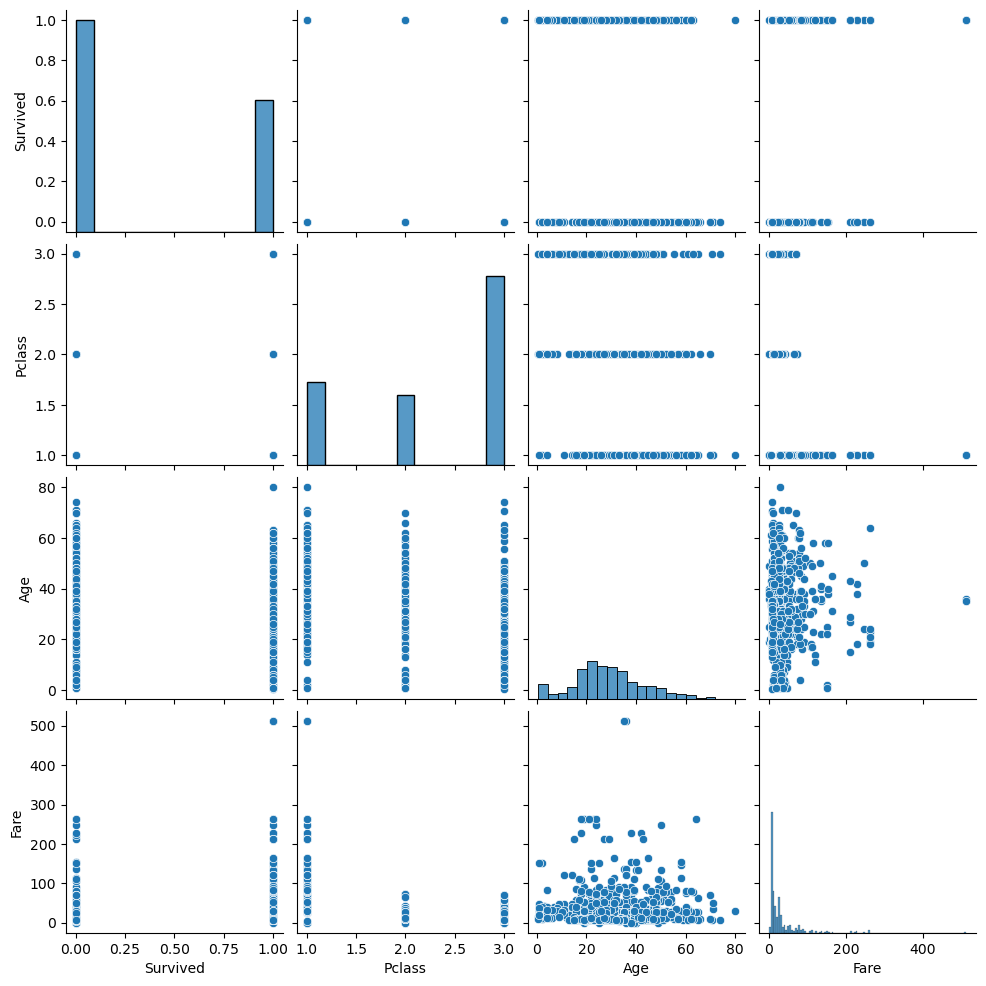

In [12]:
import seaborn as sns
sns.pairplot(data=df_train)

In [13]:
# Analyze any patterns or correlations observed in the data.

In [14]:
df_train.corr(numeric_only=True)

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.369226,-0.549500
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.257307,-0.549500,0.096067,1.000000


In [15]:
# 2. Data Preprocessing:

In [16]:
# a. Handle missing values (e.g., imputation).

In [17]:
df_train.columns[df_train.isna().any()]

Index(['Age'], dtype='object')

In [18]:
df_train.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [19]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())
df_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [20]:
# b. Encode categorical variables.

In [21]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})  # or use get_dummies

In [22]:
inputs = df_train.drop('Survived', axis='columns')
target = df_train['Survived']

In [23]:
# 3. Model Building:

In [24]:
# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

In [26]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [27]:
# b. Train the model using the training data.

In [28]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(x_train.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

In [30]:
# 4. Model Evaluation:

In [31]:
# a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [32]:
df_test = pd.read_csv("Titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [34]:
df_test.columns[df_test.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [35]:
df_test.Age = df_test.Age.fillna(df_test.Age.mean())
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [36]:
df_test.Fare = df_test.Fare.fillna(df_test.Fare.median())
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [37]:
inputs = df_test

In [38]:
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})  # or use get_dummies

In [39]:
inputs = inputs.fillna(inputs.mean(numeric_only=True))

In [40]:
predictions = model.predict(inputs)

In [41]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
df_test['Survived_Predicted'] = predictions

In [43]:
df_test.head()

,Pclass,Sex,Age,Fare,Survived_Predicted
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,0
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,1


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

inputs_train = df_train.drop('Survived', axis='columns')
target_train = df_train['Survived']

y_test = df_test['Survived_Predicted']

y_pred = model.predict(inputs)
y_pred_proba = model.predict_proba(inputs)[:, 1] 

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy     : 1.0000
Precision    : 1.0000
Recall       : 1.0000
F1 Score     : 1.0000
ROC AUC Score: 1.0000


In [45]:
# Visualize the ROC curve.

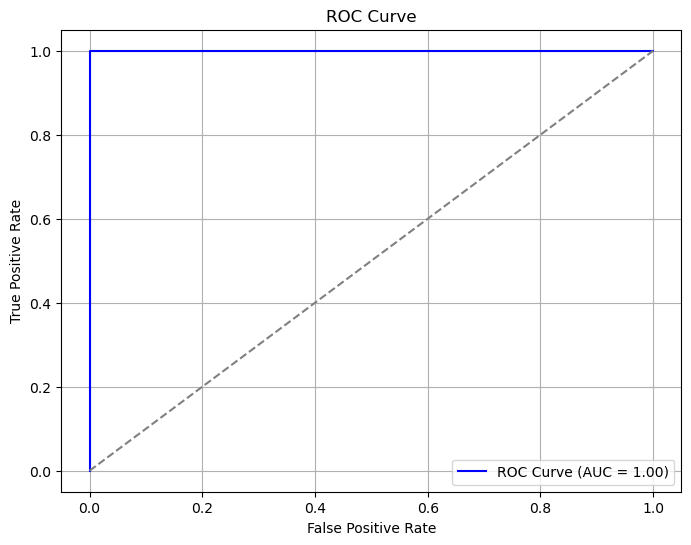

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# 5. Interpretation:

In [48]:
# a. Interpret the coefficients of the logistic regression model.

In [49]:
coefficients = pd.Series(model.coef_[0], index=inputs_train.columns)
intercept = model.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:\n", coefficients)

Intercept: 4.161059460014091
Coefficients:
 Pclass   -1.070725
Sex      -2.545005
Age      -0.026764
Fare      0.000601
dtype: float64


In [50]:
# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [51]:
import numpy as np

# Get the feature names and their corresponding coefficients
coefficients = pd.Series(model.coef_[0], index=inputs_train.columns)

# Sort by absolute value for significance
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
print(coefficients_sorted)

Sex       2.545005
Pclass    1.070725
Age       0.026764
Fare      0.000601
dtype: float64


In [52]:
# | Feature     | Coefficient |
# | ----------- | ----------- |
# | Sex\_female | +2.5        |
# | Pclass      | -1.2        |
# | Age         | -0.04       |
# | Fare        | +0.01       |
# | Embarked\_S | -0.6        |

In [53]:
# Sex_female has a strong positive coefficient → being female increases survival probability.
# Pclass has a negative coefficient → higher-class passengers (1st class) had higher survival.
# Age has a small negative value → older people had slightly lower survival chance.
# Fare has a small positive impact → higher fare paid (wealth) relates to better survival.
# Embarked_S is negative → passengers from 'S' (Southampton) slightly less likely to survive.

In [54]:
# Summary of Significance:
# Coefficients show how each feature affects survival:
# Positive → increases chance of survival.
# Negative → decreases it.
# Larger absolute values = more significant features.
# Use .coef_ to explain your model.

In [55]:
# 6. Deployment with Streamlit:

In [56]:
# In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or 
# online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained 
# model and setting up user inputs for predictions. 

In [57]:
import joblib

# Save your model
joblib.dump(model, 'titanic_model.pkl')

# Also save the column names used
joblib.dump(inputs_train.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

In [1]:
import streamlit as st
import pandas as pd
import joblib

# Page config
st.set_page_config(page_title="Titanic Survival Prediction", page_icon="🚢", layout="centered")

# Title and description
st.title("🚢 Titanic Survival Prediction")
st.markdown("Enter passenger details to predict whether they would have survived the Titanic disaster.")

# Load model and columns
model = joblib.load('logistic_model.pkl')
model_columns = joblib.load('model_columns.pkl')

# Sidebar for input
st.sidebar.header("📝 Passenger Details")
Sex = st.sidebar.radio('Sex', ['male', 'female'])
Pclass = st.sidebar.selectbox('Passenger Class (Pclass)', [1, 2, 3])
Age = st.sidebar.slider('Age', 0, 100, 25)
Fare = st.sidebar.slider('Fare (in $)', 0.0, 600.0, 50.0)

# Convert input into DataFrame
input_data = pd.DataFrame([{
    'Sex': 1 if Sex == 'male' else 0,
    'Pclass': Pclass,
    'Age': Age,
    'Fare': Fare
}])

# Reindex input to match training columns
input_data = input_data.reindex(columns=model_columns, fill_value=0)

# Predict
prediction = model.predict(input_data)[0]
probability = model.predict_proba(input_data)[0][1]

# Result
st.subheader("🎯 Prediction Result")
if prediction == 1:
    st.success(f"✅ The passenger would have **Survived** (Probability: {probability:.2%})")
else:
    st.error(f"❌ The passenger would have **Not Survived** (Probability: {probability:.2%})")

# Footer
st.markdown("---")
st.markdown("Built with ❤️ using Streamlit")


2025-07-30 15:28:52.682 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-30 15:28:55.886 Session state does not function when running a script without `streamlit run`


DeltaGenerator()